NOTE TO MYSELF: Source 9 rerun *is* included in this, edited line 239 of Result_files/high_f/final_best_positions.txt manually

In [2]:
# Mac Bodge for TeX
import os 
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [3]:
# !pip3 install powerlaw

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib
import scipy
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
from matplotlib.colors import LogNorm
import pickle
import numpy.typing as npt
from typing import Optional
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MaxNLocator

import powerlaw
plt.style.use('science')
matplotlib.rcParams.update({'font.size': 25})

In [5]:
catalog = pd.read_csv('../Shared_data_files/catalog.csv')
catalog['Name'] = np.array([['Source 1'],
                            ['Source 5'],
                            ['Source 8'],
                            ['Source 9'],
                            ['Source 10']])


In [6]:
# Choose a discrete colormap (here "tab10")
base_cmap = plt.cm.get_cmap("tab10")

# Extract the first 5 colors
colors = base_cmap.colors[:5]

# Create a ListedColormap
cmap = ListedColormap(colors)

/var/folders/8g/7279dvmd20vd_b85_lr8pfh80000gp/T/ipykernel_8959/1291141854.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = plt.cm.get_cmap("tab10")


In [7]:
low_f_results = np.loadtxt('../Shared_data_files/Search_results/low_f/final_best_positions.txt')
high_f_results = np.loadtxt('../Shared_data_files/Search_results/high_f/final_best_positions.txt')
search_results = []
search_results.extend(list(high_f_results[high_f_results[:,-1]>90]))
search_results.extend(list(low_f_results[low_f_results[:,-1]>90]))
search_results = np.array(search_results)

In [8]:
def fit_power_law_model_and_evaluate_probabilities_estimate_peak(false_alarm_samples: npt.NDArray,
                                                   search_statistics: npt.NDArray)->npt.NDArray:

    '''Power law model is p(x) \propto x^(-alpha) for x>xmin '''


    fit  = powerlaw.Fit(false_alarm_samples)
    print('Power law exponent: ', fit.power_law.alpha, 'Power law xmin: ',fit.power_law.xmin)


    # fraction of samples above peak. Power law distribution normally integrates to 1 between peak and infinity, so just add a prefactor to integrate to f the fraction of samples above peak.
    f = np.sum(false_alarm_samples>fit.power_law.xmin)/len(false_alarm_samples)

    A = ((-np.abs(fit.power_law.alpha)+1)*f)/(-fit.power_law.xmin**(-np.abs(fit.power_law.alpha)+1))
    power_law_limits = A/(-np.abs(fit.power_law.alpha)+1) * -(search_statistics)**(-np.abs(fit.power_law.alpha)+1)
    return(power_law_limits)


def fit_gumbel_model_and_evaluate_probabilities(false_alarm_samples: npt.NDArray,
                                                   search_statistics: npt.NDArray)->npt.NDArray:
    

      
    gumbel_params = scipy.stats.gumbel_r.fit(false_alarm_samples)

    gumbel_limits = scipy.stats.gumbel_r.sf(search_statistics,loc=gumbel_params[0],scale=gumbel_params[1])

    return(gumbel_limits)


Source 1
Gapped false alarm rates: 
Calculating best minimal value for power law fit
Power law exponent:  12.414946086666006 Power law xmin:  47.56103294128933
Calculating best minimal value for power law fit
Power law exponent:  12.414946086666006 Power law xmin:  47.56103294128933
8.735364086382235e-06
9.028166513652906e-08


Source 5
Gapped false alarm rates: 
Calculating best minimal value for power law fit
Power law exponent:  16.762182724630332 Power law xmin:  60.10262211717701
Calculating best minimal value for power law fit
Power law exponent:  16.762182724630332 Power law xmin:  60.10262211717701
4.915242943150036e-07
1.161875362107203e-07


Source 8
Gapped false alarm rates: 
Calculating best minimal value for power law fit
Power law exponent:  11.299116803529921 Power law xmin:  53.71346834001108
Calculating best minimal value for power law fit
Power law exponent:  11.299116803529921 Power law xmin:  53.71346834001108
4.3670199242579525e-09
8.764416955809124e-23


Source 9


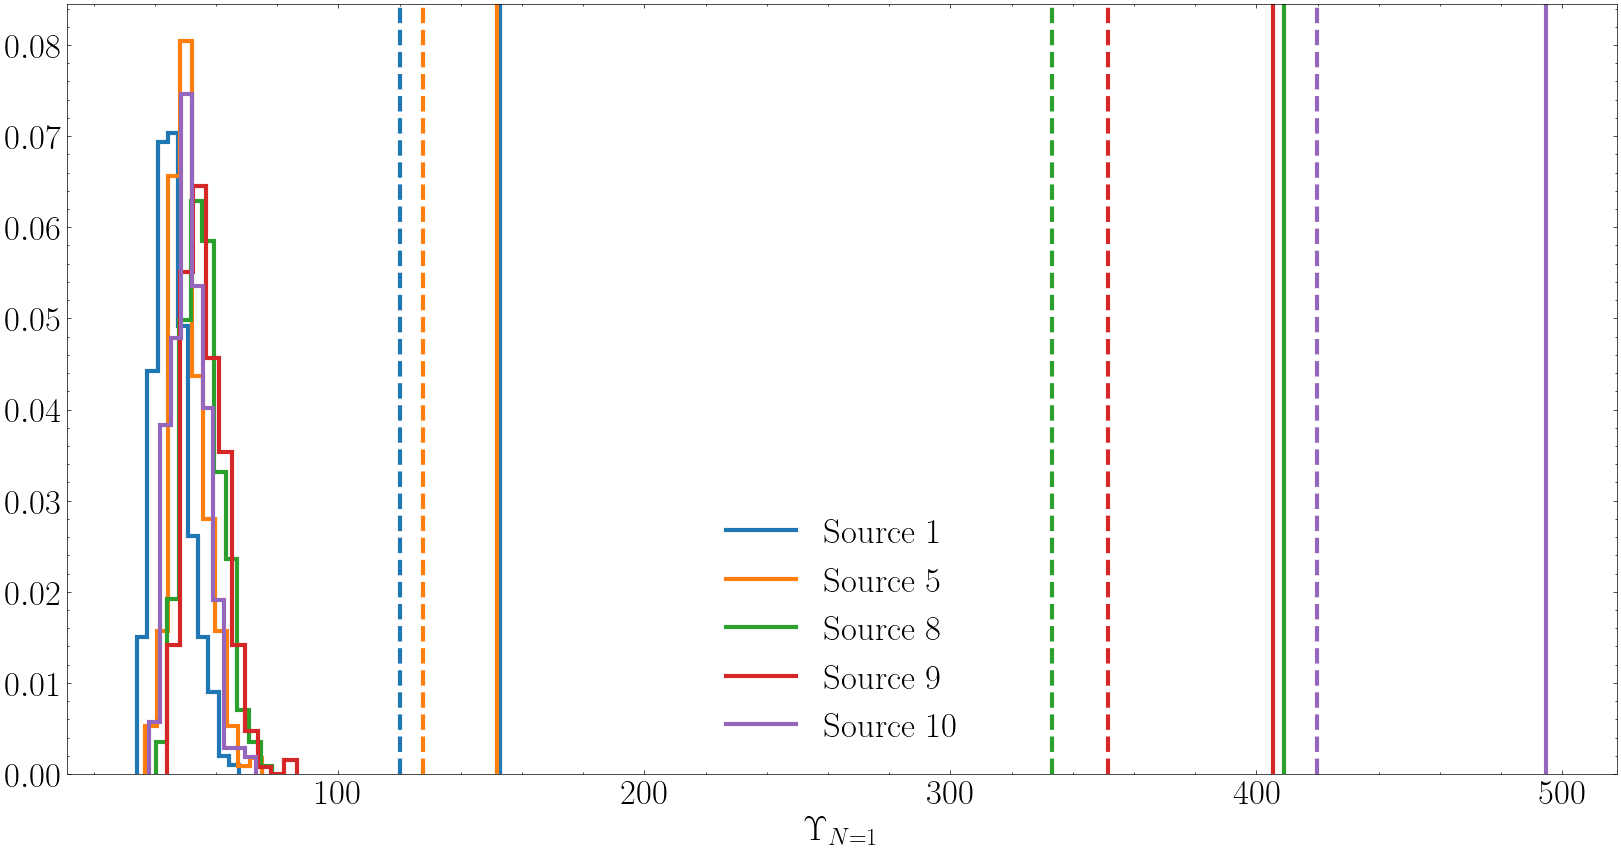

In [9]:
### Prototyping the bottom figure 

sobbh_indexes = [1,5,8,9,10]


plt.figure(figsize=(20,10))
ax = plt.gca()

histogram_samples_storage = []
max_histogram_bin = []
# Gapped power laws 

gapped_power_law_false_alarms = []

# Ungappped power laws

ungapped_power_law_false_alarms = []

# Gapped Gumbel 

gapped_gumbel_false_alarms = []

# Ungapped Gumbel 

ungapped_gumbel_false_alarms = []

# Storage of bins 
histogram_bins_storage =[]

for true_index,index in enumerate(sobbh_indexes):
    filename = '../Shared_data_files/False_Alarm_Runs/SOBBH'+str(index)+'/results_storage.txt'
    FAP_data = np.loadtxt(filename)
    final_upsilons = FAP_data[:,-1]
    ax.hist(final_upsilons,histtype='step',bins=10,lw=3,color=cmap(true_index),density=True)#,label='Source '+str(index))


    histogram_samples_storage.append(final_upsilons)
## Gapped results
for index,row in catalog.iterrows():
    print(row['Name'])
    final_swarm_data = np.loadtxt('../Shared_data_files/Gapped/' + row['Name'] + '/best_position_and_value.txt')
    best_position= final_swarm_data[:-1]
    best_value = final_swarm_data[-1]
    ax.axvline(best_value,lw=3,color=cmap(index),ls='--')
    print('Gapped false alarm rates: ')
    gapped_power_law_false_alarms.append(fit_power_law_model_and_evaluate_probabilities_estimate_peak(histogram_samples_storage[index],np.array(best_value)))
    gapped_gumbel_false_alarms.append(fit_gumbel_model_and_evaluate_probabilities(histogram_samples_storage[index],np.array(best_value)))
    print(fit_power_law_model_and_evaluate_probabilities_estimate_peak(histogram_samples_storage[index],np.array(best_value)))
    print(fit_gumbel_model_and_evaluate_probabilities(histogram_samples_storage[index],np.array(best_value)))
    print('\n')

## Full duty cycle results s
for true_index,row in catalog.iterrows():
    print(row['Name'])

    m1 = row['Mass1']
    m2 = row['Mass2']

    mc = ((m1*m2)**(3/5))/(m1+m2)**(1/5)
    ecliptic_lat = row['EclipticLatitude']
    ecliptic_long = row['EclipticLongitude']
    f_low = row['InitialFrequency']

    index = np.argmin(np.abs(search_results[:,0] - mc))

    max_upsilon = search_results[index,-1]
    ax.axvline(max_upsilon,lw=3,color=cmap(true_index),label=row['Name'])

    # PREDICTED GAPPED SEARCH STATISTIC
    # ax.axvline(max_upsilon*0.85,lw=1,color=cmap(true_index),ls='dotted')

    print('Full duty cycle false alarm rates: ')
    ungapped_power_law_false_alarms.append(fit_power_law_model_and_evaluate_probabilities_estimate_peak(histogram_samples_storage[true_index],np.array(max_upsilon)))
    ungapped_gumbel_false_alarms.append(fit_gumbel_model_and_evaluate_probabilities(histogram_samples_storage[true_index],np.array(max_upsilon)))
    print(fit_power_law_model_and_evaluate_probabilities_estimate_peak(histogram_samples_storage[true_index],np.array(max_upsilon)))
    print(fit_gumbel_model_and_evaluate_probabilities(histogram_samples_storage[true_index],np.array(max_upsilon)))

    print('\n')

ax.legend()


# ax.semilogy()
plt.xlabel(r'$\Upsilon_{N=1}$')
# plt.ylabel('False alarm probability')
# plt.savefig('Fig.2_bottom_panel.pdf')
plt.show()

In [10]:
matplotlib.rcParams.update({'font.size': 20})

/var/folders/8g/7279dvmd20vd_b85_lr8pfh80000gp/T/ipykernel_8959/1909035984.py:31: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  broken_tiles = np.loadtxt('../Shared_data_files/Search_results/broken_tiles.txt',dtype=int)


Source 1
4
Source 5
1
Source 8
3
Source 9
2
Source 10
0
(300,)
(300,)
(300,)
(300,)
(300,)
GAPPED FAPS: 

Source 1
Calculating best minimal value for power law fit
Power law exponent:  12.414946086666006 Power law xmin:  47.56103294128933
Calculating best minimal value for power law fit
Power law exponent:  12.414946086666006 Power law xmin:  47.56103294128933
8.735364086382235e-06
9.028166513652906e-08


Source 5
Calculating best minimal value for power law fit
Power law exponent:  16.762182724630332 Power law xmin:  60.10262211717701
Calculating best minimal value for power law fit
Power law exponent:  16.762182724630332 Power law xmin:  60.10262211717701
4.915242943150036e-07
1.161875362107203e-07


Source 8
Calculating best minimal value for power law fit
Power law exponent:  11.299116803529921 Power law xmin:  53.71346834001108
Calculating best minimal value for power law fit
Power law exponent:  11.299116803529921 Power law xmin:  53.71346834001108
4.3670199242579525e-09
8.764416

/var/folders/8g/7279dvmd20vd_b85_lr8pfh80000gp/T/ipykernel_8959/1909035984.py:341: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


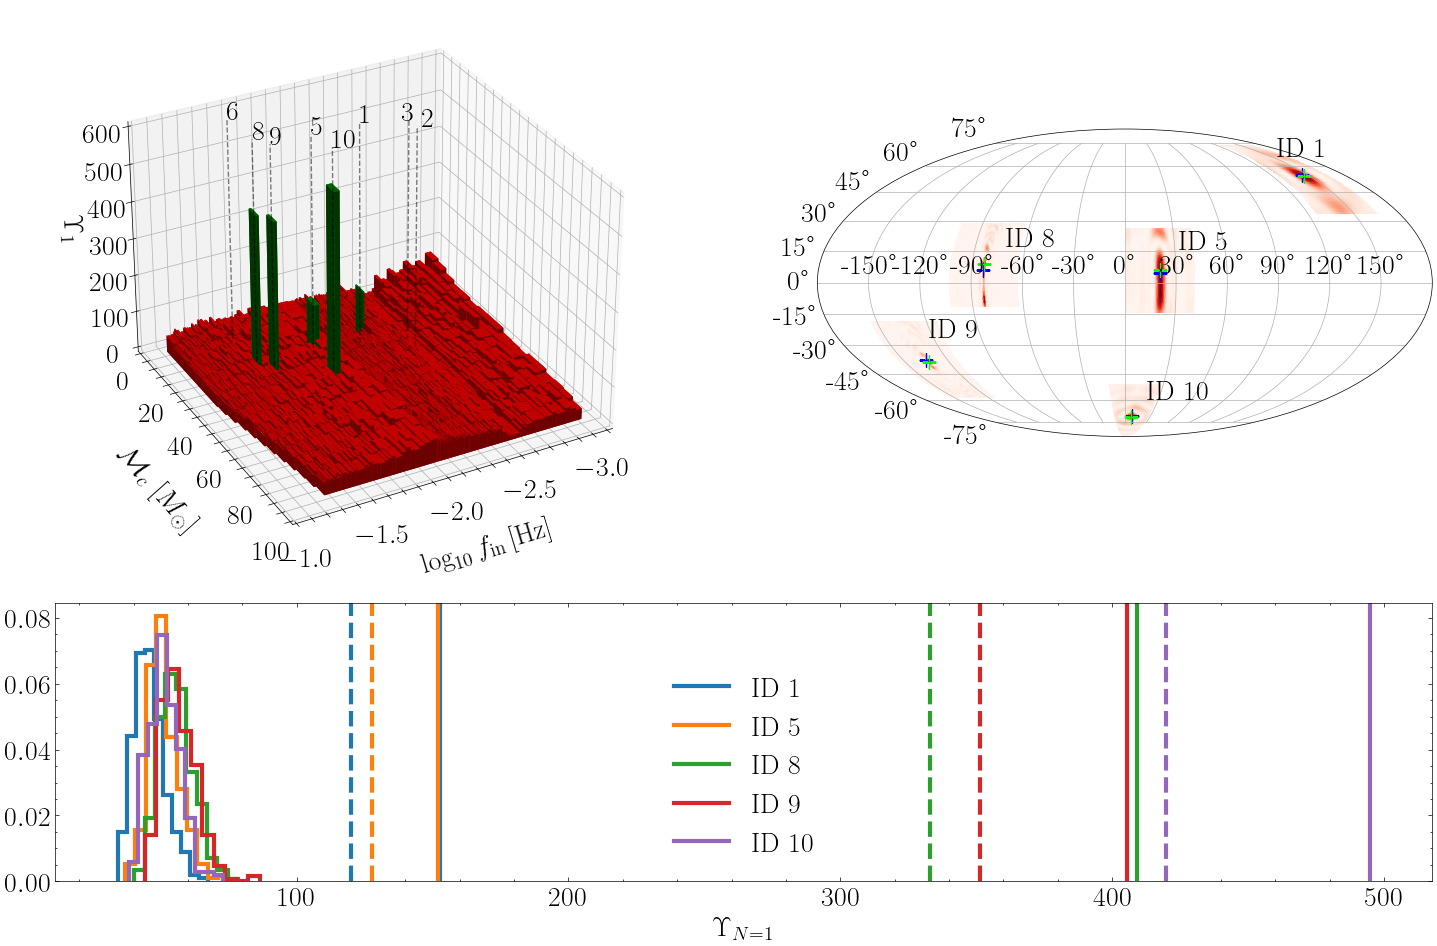

In [16]:
from matplotlib.ticker import MultipleLocator


fig = plt.figure(figsize=(15,10),constrained_layout=True)
gs = gridspec.GridSpec(nrows=2, ncols=2,height_ratios=[2,1])
ax0 = fig.add_subplot(gs[0, 0],projection='3d')



# ######## top right plot: tf 


low_f_results = np.loadtxt('../Shared_data_files/Search_results/low_f/final_best_positions.txt')
low_f_priors = np.load('../Shared_data_files/Search_results/low_f/priors.npy')
f_low_priors = np.log10(low_f_priors[:,0,:])
mc_priors = low_f_priors[:,1,:]
upsilon_maxes = low_f_results[:,-1]
f_low_anchors = f_low_priors[:,0]
mc_anchors = mc_priors[:,0]

f_low_widths = np.diff(f_low_priors,axis=1).flatten()
mc_widths = np.diff(mc_priors,axis=1).flatten()

master_upsilon_maxes = list(upsilon_maxes)
master_f_low_anchors = list(f_low_anchors)
master_mc_anchors = list(mc_anchors)
master_f_low_widths = list(f_low_widths)
master_mc_widths = list(mc_widths)

# These are the tiles in which even with 3 hour TF segment the whole evolution of the signal cannot be split up into N_high segments. I.e the beginning of the search does not work
broken_tiles = np.loadtxt('../Shared_data_files/Search_results/broken_tiles.txt',dtype=int)
broken_tiles = broken_tiles[broken_tiles<1201]

high_f_results = np.loadtxt('../Shared_data_files/Search_results/high_f/final_best_positions.txt')
high_f_priors = np.load('../Shared_data_files/Search_results/high_f/priors.npy')

high_f_results = np.delete(high_f_results,broken_tiles,axis=0)
high_f_priors = np.delete(high_f_priors,broken_tiles,axis=0)

f_low_priors = np.log10(high_f_priors[:,0,:])
mc_priors = high_f_priors[:,1,:]

upsilon_maxes = high_f_results[:,-1]

f_low_anchors = f_low_priors[:,0]
mc_anchors = mc_priors[:,0]

f_low_widths = np.diff(f_low_priors,axis=1).flatten()
mc_widths = np.diff(mc_priors,axis=1).flatten()

master_upsilon_maxes.extend(list(upsilon_maxes))
master_f_low_anchors.extend(list(f_low_anchors))
master_mc_anchors.extend(list(mc_anchors))
master_f_low_widths.extend(list(f_low_widths))
master_mc_widths.extend(list(mc_widths))


colors = ['g' if i is i>=90 else 'r' for i in master_upsilon_maxes]

f_low_sources = [5.85830665*1.e-3,
                 3.00851783*1.e-3,
                 3.00698596*1.e-3,
                 12.24273032*1.e-3,
                 28.02352272 *1.e-3,
                 27.65438527*1.e-3,
                 23.76783772*1.e-3,
                 11.31112717*1.e-3]
mc_sources  =[29.34741587,
              38.04622881,
              34.51216704,
              27.41970433,
              7.007404972,
              22.40969304,
              26.08583360,
              39.14942200]
labels = ['1',
          '2', 
          '3',
          '5',
          '6',
          '8',
          '9',
          '10']




ax0.view_init(elev=30
             , azim=62)
bottom_anchor_points = np.zeros_like(master_upsilon_maxes)

ax0.bar3d(np.array(master_f_low_anchors),
         np.array(master_mc_anchors), 
         np.array(bottom_anchor_points), 
         np.array(master_f_low_widths),
         np.array(master_mc_widths), 
         np.array(master_upsilon_maxes), shade=True,color=colors,zorder=1)

ax0.set_xlabel(r'$\mathrm{log}_{\mathrm{10}}\, f_{\mathrm{in}} \, [\rm Hz]$',labelpad = 15)
ax0.set_ylabel(r'$\mathcal{M}_c \,\,  [M_{\odot}]$',labelpad = 15)
ax0.set_zlabel(r'$\Upsilon_{1}$',labelpad=7)

pos = ax0.get_position()
ax0.set_position([pos.x0 + 0.05, pos.y0 + 0.05,
                 pos.width * 0.9, pos.height * 0.9])
# ax0.set_box_aspect([2,2,1.5]) 
# Comented out bit of code plots the sources at their actual locations rather than the middle of the tiles

# for i in range(len(f_low_sources)):
#     ax.plot([np.log10(f_low_sources[i]),np.log10(f_low_sources[i])],
#              [mc_sources[i],mc_sources[i]],
#              [0,600],lw=2,color='k',ls='--',zorder=3)
#     # print(i)
#     ax.text(np.log10(f_low_sources[i]),mc_sources[i],600,labels[i])

for i in range(len(f_low_sources)):

    # Following stuff just makes it easier to plot the sources in the middle of the tiles
    
    d_Mc = 5 
    Mcs = np.arange(5,100,d_Mc)

    # High frequency 
    if f_low_sources[i] >= 0.01:
        d_flow = 0.001
        f_lows = np.arange(0.01,0.1,d_flow)

        f_index = np.searchsorted(f_lows,f_low_sources[i])

        f_low_plot = (f_lows[f_index-1]+f_lows[f_index])/2

        Mc_index = np.searchsorted(Mcs,mc_sources[i])

        Mc_plot = (Mcs[Mc_index-1]+Mcs[Mc_index])/2

        
    #Low frequency 
    else:
        d_flow = 0.0001
        f_lows = np.arange(0.001,0.01,d_flow)

        f_index = np.searchsorted(f_lows,f_low_sources[i])

        f_low_plot = (f_lows[f_index-1]+f_lows[f_index])/2

        Mc_index = np.searchsorted(Mcs,mc_sources[i])

        Mc_plot = (Mcs[Mc_index-1]+Mcs[Mc_index])/2

    ax0.plot([np.log10(f_low_plot),np.log10(f_low_plot)],
             [Mc_plot,Mc_plot],
             [0,600],lw=1,color='k',ls='--',zorder=3,alpha=0.5)
    # Bodge to seperate labels 2 and 3 
    if labels[i] == '2':
        ax0.text(np.log10(f_low_plot)*1.01,Mc_plot*1.01,600,labels[i])
    elif labels[i] == '3':
        ax0.text(np.log10(f_low_plot)*0.98,Mc_plot*0.98,600,labels[i])
    else:
        ax0.text(np.log10(f_low_plot),Mc_plot,600,labels[i])


ax0.xaxis.set_major_locator(MaxNLocator(nbins=5))
############################################################################################


#### Skymap figure #####
catalog = pd.read_csv('../Shared_data_files/catalog.csv')
catalog['Name'] = np.array([['Source 1'],
                            ['Source 5'],
                            ['Source 8'],
                            ['Source 9'],
                            ['Source 10']])
ax0_1 = fig.add_subplot(gs[0, 1],projection='mollweide')

ax0_1.grid(True)

for index,sobbh in catalog.iterrows():
    print(sobbh['Name'])

    m1 = sobbh['Mass1']
    m2 = sobbh['Mass2']

    mc = ((m1*m2)**(3/5))/(m1+m2)**(1/5)
    ecliptic_lat_injected = sobbh['EclipticLatitude']
    ecliptic_long_injected = sobbh['EclipticLongitude']
    # f_low = sobbh['InitialFrequency']

    index = np.argmin(np.abs(search_results[:,0] - mc))

    print(index)
    
    max_upsilon = search_results[index,-1]

    # parameters (FROM SEARCH)

    mc_search_result = search_results[index][0]
    q_search_result = search_results[index][1]
    cosinc_search_result = search_results[index][2]
    e0_search_result = search_results[index][3]
    f0_search_result = search_results[index][4]
    lambda_search_result = search_results[index][5]
    beta_search_result = search_results[index][6]
    psi_search_result = search_results[index][7]

    # Load in precomputed skymap datafile
    # Format is X,Y,statistics
    datafile = np.load(str('../Shared_data_files/Skymaps/'+sobbh['Name'])+'_skymap.npy')

    X = datafile[0]
    Y = datafile[1]
    statistics = datafile[2]

    # Make a grid of (lambda,beta) around the found source
    sqrt_N = 120 #NOTE: RESOLTION OF SKYMAP HAS TO MATCH WHAT WAS USED TO CREATE THE DATAFILE ABOVE


    lambdas_unravelled = X.flatten()
    betas_unravelled = Y.flatten()

    ax0_1.pcolormesh(X-np.pi,Y,statistics,cmap='Reds')
    # plt.colorbar()
    ax0_1.scatter(ecliptic_long_injected-np.pi,ecliptic_lat_injected,marker='+',s=100,color='b',linewidths=1)
    ax0_1.scatter(lambda_search_result-np.pi,beta_search_result,marker='+',s=100,color='lime',linewidths=1)

    # ax0_1.axvline(ecliptic_long_injected-np.pi,ymin = np.min(Y),ymax=np.max(Y),color='b',ls='--',lw=1)

    name_replacement = sobbh['Name'].replace('Source','ID')
    
    ax0_1.text((ecliptic_long_injected-np.pi)+0.2,ecliptic_lat_injected+0.2,name_replacement)
    # plt.xlabel('Ecliptic longitude [rads]')
    # plt.ylabel('Ecliptic latitude [rads]')
    # plt.show()
    

pos = ax0_1.get_position()
ax0_1.set_position([
    pos.x0 - 0.05,   # move left
    pos.y0 - 0.05,   # move down
    pos.width * 1.1, # make wider
    pos.height * 1.1 # make taller
])


############################################################################################

### Prototyping the bottom figure 
ax1 = fig.add_subplot(gs[1, :])
sobbh_indexes = [1,5,8,9,10]

histogram_samples_storage = []
max_histogram_bin = []
# Gapped power laws 

gapped_power_law_false_alarms = []

# Ungappped power laws

ungapped_power_law_false_alarms = []

# Gapped Gumbel 

gapped_gumbel_false_alarms = []

# Ungapped Gumbel 

ungapped_gumbel_false_alarms = []

# Storage of bins 
histogram_bins_storage =[]

for true_index,index in enumerate(sobbh_indexes):
    filename = '../Shared_data_files/False_alarm_runs/SOBBH'+str(index)+'/results_storage.txt'
    FAP_data = np.loadtxt(filename)
    final_upsilons = FAP_data[:,-1]
    print(final_upsilons.shape)
    ax1.hist(final_upsilons,histtype='step',bins=10,lw=3,color=cmap(true_index),density=True)#,label='Source '+str(index))

    counts,bins = np.histogram(final_upsilons,bins=10)
    bin_midpoints = (bins[1:] + bins[:-1])/2

    max_bin = bin_midpoints[np.argmax(counts)+1]
    max_histogram_bin.append(max_bin)

    histogram_samples_storage.append(final_upsilons)
    histogram_bins_storage.append(bins)
## Gapped results
print('GAPPED FAPS: \n')
for index,row in catalog.iterrows():
    print(row['Name'])
    final_swarm_data = np.loadtxt('../Shared_data_files/Gapped/' + row['Name'] + '/best_position_and_value.txt')
    best_position= final_swarm_data[:-1]
    best_value = final_swarm_data[-1]
    ax1.axvline(best_value,lw=3,color=cmap(index),ls='--')

    # ax1.scatter(best_value,0.03,lw=3,color=cmap(index),marker="v")
    # print('Gapped false alarm rates: ')
    gapped_power_law_false_alarms.append(fit_power_law_model_and_evaluate_probabilities_estimate_peak(histogram_samples_storage[index],np.array(best_value)))
    gapped_gumbel_false_alarms.append(fit_gumbel_model_and_evaluate_probabilities(histogram_samples_storage[index],np.array(best_value)))
    print(fit_power_law_model_and_evaluate_probabilities_estimate_peak(histogram_samples_storage[index],np.array(best_value)))
    print(fit_gumbel_model_and_evaluate_probabilities(histogram_samples_storage[index],np.array(best_value)))
    print('\n')

## Full duty cycle results
print('FULL DUTY CYCLE FAPS: \n')

for true_index,row in catalog.iterrows():
    print(row['Name'])

    m1 = row['Mass1']
    m2 = row['Mass2']

    mc = ((m1*m2)**(3/5))/(m1+m2)**(1/5)
    ecliptic_lat = row['EclipticLatitude']
    ecliptic_long = row['EclipticLongitude']
    f_low = row['InitialFrequency']

    index = np.argmin(np.abs(search_results[:,0] - mc))

    max_upsilon = search_results[index,-1]
    name_replacement = row['Name'].replace('Source','ID')
    ax1.axvline(max_upsilon,lw=3,color=cmap(true_index),label=name_replacement)
    # ax1.scatter(max_upsilon,0.06,lw=3,color=cmap(true_index),label=row['Name'],marker="^")

    # PREDICTED GAPPED SEARCH STATISTIC
    # ax.axvline(max_upsilon*0.85,lw=1,color=cmap(true_index),ls='dotted')

    print('Full duty cycle false alarm rates: ')
    ungapped_power_law_false_alarms.append(fit_power_law_model_and_evaluate_probabilities_estimate_peak(histogram_samples_storage[true_index],np.array(max_upsilon)))
    ungapped_gumbel_false_alarms.append(fit_gumbel_model_and_evaluate_probabilities(histogram_samples_storage[true_index],np.array(max_upsilon)))
    print(fit_power_law_model_and_evaluate_probabilities_estimate_peak(histogram_samples_storage[true_index],np.array(max_upsilon)))
    print(fit_gumbel_model_and_evaluate_probabilities(histogram_samples_storage[true_index],np.array(max_upsilon)))

    print('\n')

ax1.legend()

# ax.semilogy()

ax1.set_xlabel(r'$\Upsilon_{N=1}$')
# ax1.set_ylabel('Number of events')
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig('Fig_2.pdf')
plt.show()

In [12]:


df_latex_table = pd.DataFrame({
    "Names": catalog['Name'].to_list(),
    "Power law: Full duty cycle": np.array(ungapped_power_law_false_alarms),
    "Power law: 85% duty cyle": np.array(gapped_power_law_false_alarms),
    "Gumbel: Full duty cycle": np.array(ungapped_gumbel_false_alarms),
    "Gumbel: 85% duty cycle": np.array(gapped_gumbel_false_alarms)
})


In [13]:
df_latex_table

,Names,Power law: Full duty cycle,Power law: 85% duty cyle,Gumbel: Full duty cycle,Gumbel: 85% duty cycle
0,Source 1,5.612497e-07,8.735364e-06,9.173639e-11,9.028167e-08
1,Source 5,3.169665e-08,4.915243e-07,8.752557e-10,1.161875e-07
2,Source 8,5.242970e-10,4.367020e-09,8.927701e-29,8.764417e-23
3,Source 9,3.526669e-13,2.743050e-12,5.958915e-29,1.255276e-24
4,Source 10,8.392331e-18,1.456134e-16,4.137159e-39,1.164023e-32


In [14]:
# plt.figure(figsize=(20,10))

# filename = '../Fig2/False_Alarm_Runs/SOBBH8/results_storage.txt'
# FAP_data = np.loadtxt(filename)
# final_upsilons = FAP_data[:,-1]
# print(final_upsilons.shape)
# plt.hist(final_upsilons,histtype='step',bins=10,lw=3,color=cmap(true_index),density=True)#,label='Source '+str(index))

# counts,bins = np.histogram(final_upsilons,bins=10)
# bin_midpoints = (bins[1:] + bins[:-1])/2

# max_bin = bin_midpoints[np.argmax(counts)]
# max_histogram_bin.append(max_bin)

# histogram_samples_storage.append(final_upsilons)
# histogram_bins_storage.append(bins)
# f = np.sum(final_upsilons>max_bin)/len(final_upsilons)

# power_law_params = scipy.stats.pareto.fit(final_upsilons[final_upsilons>max_bin])
# power_law_limits = scipy.stats.pareto.sf(100, *power_law_params)
# x = np.linspace(20,120,1000)
# plt.plot(x, scipy.stats.pareto.pdf(x, *power_law_params)*f)
# print(power_law_limits)



# gumbel_params = scipy.stats.gumbel_r.fit(final_upsilons)

# gumbel_limits = scipy.stats.gumbel_r.sf(final_upsilons,loc=gumbel_params[0],scale=gumbel_params[1])

# plt.plot(x, scipy.stats.gumbel_r.pdf(x, *gumbel_params))


# # Powerlaw fit
# fit  = powerlaw.Fit(final_upsilons)

# print('Power law exponent: ', fit.power_law.alpha, 'Power law xmin: ',fit.power_law.xmin)


# A = ((-np.abs(fit.power_law.alpha)+1)*f)/(-fit.power_law.xmin**(-np.abs(fit.power_law.alpha)+1))
# power_law_limits = A/(-np.abs(fit.power_law.alpha)+1) * -(100)**(-np.abs(fit.power_law.alpha)+1)
# print(power_law_limits)
# print('IF NORMALISED CORRECTLY,: ',A/(-np.abs(fit.power_law.alpha)+1) * -(fit.power_law.xmin)**(-np.abs(fit.power_law.alpha)+1),'SHOULD BE: ', f)
# plt.plot(x[x>fit.power_law.xmin],A*x[x>fit.power_law.xmin]**(-np.abs(fit.power_law.alpha)))
# plt.semilogy()
# plt.ylim(1.e-7,1.e-1)
# plt.show()


# # final_swarm_data = np.loadtxt('../SupMat-Fig6/Gapped/Source 6/best_position_and_value.txt')
# # best_position= final_swarm_data[:-1]
# # best_value = final_swarm_data[-1]
# # plt.axvline(best_value,lw=3,color=cmap(index),ls='--')

# # # ax1.scatter(best_value,0.03,lw=3,color=cmap(index),marker="v")
# # # print('Gapped false alarm rates: ')
# # gapped_power_law_false_alarms.append(fit_power_law_model_and_evaluate_probabilities(histogram_samples_storage[index],np.array(best_value),max_histogram_bin[index]))
# # gapped_gumbel_false_alarms.append(fit_gumbel_model_and_evaluate_probabilities(histogram_samples_storage[index],np.array(best_value),bins))
# # print(fit_power_law_model_and_evaluate_probabilities(histogram_samples_storage[index],np.array(best_value),max_histogram_bin[index]))
# # print(fit_gumbel_model_and_evaluate_probabilities(histogram_samples_storage[index],np.array(best_value),bins))
# # print('\n')


In [1]:
'Source 1'.replace('Source','ID')

'ID 1'